In [66]:
import numpy
from matplotlib import pyplot
from scipy.integrate import simps
from matplotlib.patches import Rectangle
%matplotlib inline

In [67]:
def derivate_2(data, h):
    out = numpy.array(data)
    for i in range(1, len(data) - 1):
        out[i] = data[i + 1] - 2 * data[i] + data[i - 1]
    out = out / (h * h)
    
    # forward
    out[0] = (data[2] - 2 * data[1] + data[0]) / (h * h)
    
    # backward
    out[-1] = (data[-1] - 2 * data[-2] + data[-3]) / (h * h)
    return out

def Tnm(base_n, base_m, x):
    h_bar = 1.0
    mass = 1.0
    h = x[1] - x[0]
    der_2_f_m = derivate_2(base_m, h)
    for_evaluate = - ((h_bar**2)/(2 * mass)) * numpy.conjugate(base_n) * der_2_f_m   
    return simps(for_evaluate, x).real

def Vnm(base_n, base_m, data_potential, x):
    for_evaluate = numpy.conjugate(base_n) * data_potential * base_m
    return simps(for_evaluate, x).real

def kron(i, j):
    return int(i == j)

def armonic_oscillator(x, width, w, arg2=0.0):
    mass = 1.0
    return  0.5 * mass * w ** 2 * (x - width / 2)**2

def inverted_armonic_oscillator(x, width, w, arg2=0.0):
    mass = 1.0
    return  0.5 * mass * w ** 2 * (width / 2)**2 - 0.5 * mass * w ** 2 * (x - width / 2)**2

def step(x, width, V0, arg2=0.0):
    out = numpy.zeros_like(x)
    out[x > width / 2] = V0
    return out

def barrier(x, width, V0, b):
    out = numpy.zeros_like(x)
    out[:] = V0
    out[x < width / 2 - b / 2] = 0
    out[x > width / 2 + b / 2] = 0
    return out

def pseudocoulomb(x, width, V0, b):
    return V0 / b - V0 / numpy.sqrt((x - width/2)**2 + b**2)

def square_well(x, width, V0, b):
    out = numpy.zeros_like(x)
    out[:] = 0
    out[x > width / 2 + b / 2] = V0
    out[x < width / 2 - b / 2] = V0
    return out

def linear_well(x, width, m, arg2=0.0):
    out = x.copy()
    for i, val in enumerate(x):
        if val >= width / 2:
            out[i] = width - val
    return out * m

def K_mack(a, b, E, Vo):
    alpha = cmath.sqrt(2 * E)
    beta = cmath.sqrt(2 * (E - Vo))
    sin = cmath.sin
    cos = cmath.cos
    val = (-(alpha**2 + beta**2)*sin(alpha*(a - b))*sin(beta*b)/(2*alpha*beta) + 
           cos(alpha*(a-b))*cos(beta*b))
    if abs(val) <= 1:
        return cmath.acos(val) / a
    return False

In [68]:
def infinite_well(x, n, width, K=0.0):
    return numpy.sqrt(2 / width) * numpy.sin((K + n * numpy.pi) * x / width)

def pw(x, n, width, K=0.0):
    return numpy.sqrt(1 / width) * numpy.exp(1.0j * (K + 2 * numpy.pi * n / width) * x)

In [69]:
print("Configurations:")
print()
print("Possible basis set:")
print("1: Infinite well")
print("2: Plane-wave")
print()
print("Possible potentials:")
print("1: Armonic Oscillator")
print("2: Inverted Armonic Oscillator")
print("3: Step")
print("4: Barrier")
print("5: Pseudo-coulomb")
print("6: Square Well")
print("7: Linear well")
print()
print()

list_of_potential = [armonic_oscillator,
                     inverted_armonic_oscillator,
                     step,
                     barrier,
                     pseudocoulomb,
                     square_well,
                     linear_well]


base_function = int(input("Choose the basis: "))
if base_function == 1:
    base_function = infinite_well
elif base_function == 2:
    base_function = pw
else:
    raise "The basis is not supported !!!"

potential = int(input("Choose the potential: "))
if potential in [1, 2]:
    arg1 = float(input("Set the frequency w: "))
    arg2 = 0.0
elif potential == 3:
    arg1 = float(input("Set the step height V0: "))
    arg2 = 0.0
elif potential == 7:
    arg1 = float(input("Set the slope m: "))
    arg2 = 0.0
elif potential == 4:
    arg1 = float(input("Set the barrier height V0: "))
    arg2 = float(input("Set the ration (barrier width b)/width: "))
elif potential == 6:
    arg1 = float(input("Set the well depth V0: "))
    arg2 = float(input("Set the ration (well width b)/width: "))
elif potential == 5:
    arg1 = float(input("Set the strength V0:"))
    arg2 = float(input("Set the ration (amortiguation value b)/width: "))
else:
    raise "The potential is not supported !!!"

potential_func = list_of_potential[potential - 1]

# width of the box
width = float(input("Unit cell or well width: "))
arg2 = arg2 * width
    
# amount of points for the x-array
points = int(input("Number of points: "))


N = int(input("Number of basis: "))

print()
mode = int(input("Mode [1: potential embedded in an infinite square well, 2: periodic potential]: "))

Configurations:

Possible basis set:
1: Infinite well
2: Plane-wave

Possible potentials:
1: Armonic Oscillator
2: Inverted Armonic Oscillator
3: Step
4: Barrier
5: Pseudo-coulomb
6: Square Well
7: Linear well


Choose the basis: 2
Choose the potential: 4
Set the barrier height V0: 50
Set the ration (barrier width b)/width: 0.2
Unit cell or well width: 1.0
Number of points: 200
Number of basis: 5

Mode [1: potential embedded in an infinite square well, 2: periodic potential]: 2


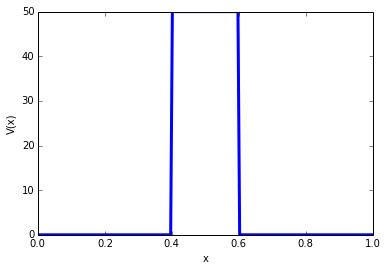

In [70]:
values_n = []

if base_function == pw:
    values_n.append(0)
    
for i in range(1, N + 1):
    values_n.append(i)
    
    if base_function == pw:
        values_n.append(-i)

if mode == 1:
    K_arr = [0]
elif mode == 2:
    K_arr = numpy.linspace(-numpy.pi, numpy.pi, 100)
    
x = numpy.linspace(0, width, points)
T = numpy.zeros(shape=(len(values_n), len(values_n), len(K_arr)))
V = numpy.zeros(shape=(len(values_n), len(values_n), len(K_arr)))

data_potential = potential_func(x, width, arg1, arg2)

pyplot.figure()
pyplot.plot(x, data_potential, lw=3)
pyplot.xlabel("x")
pyplot.ylabel("V(x)")
pyplot.show()

In [71]:
%%time
for k, Ka in enumerate(K_arr):
    for n, nval in enumerate(values_n):
        for m, mval in enumerate(values_n):
            base_n = base_function(x, nval, width, Ka)
            base_m = base_function(x, mval, width, Ka)
            
            T[n, m, k] = Tnm(base_n, base_m, x)
            V[n, m, k] = Vnm(base_n, base_m, data_potential, x)
            
            
H = T + V
if mode == 1:
    eigenenergies, eigenvectors = numpy.linalg.eig(H[:, :, 0])
    out = []
    for i in range(len(values_n)):
        out.append((eigenenergies[i], eigenvectors[:, i]))
    out = sorted(out)

    psi = [None] * len(eigenenergies)
    for n, nval in enumerate(values_n):
        eigenvector = out[n][1]
        psi[n] = 0
        for i, c_i in enumerate(eigenvector):
            psi[n] += (c_i * base_function(x, values_n[i], width))

elif mode == 2:
    energies = list()
    for k, Ka in enumerate(K_arr):
        eigenenergies, _ = numpy.linalg.eig(H[:, :, k])
        energies.append(sorted(eigenenergies))
    energies = numpy.array(energies)

    bands = dict()
    for n in range(len(values_n)):
        bands[n] = energies[:, n]
        
        
# check if the basis is orthonormal
for eigenvector in eigenvectors:
    suma = 0
    for c_n in eigenvector:
        suma += c_n ** 2
    if abs(suma - 1.0) > 0.1:
        raise "The basis set is not orthonormal"

print("The basis set is orthonormal")

The basis set is orthonormal
CPU times: user 11.3 s, sys: 0 ns, total: 11.3 s
Wall time: 11.3 s


Insert the amount of levels to plot: 4


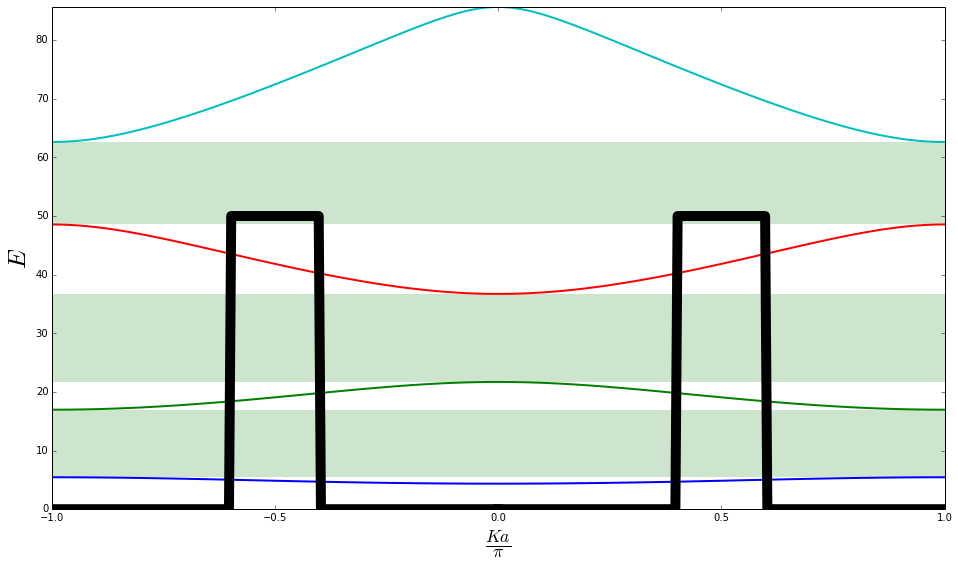

In [75]:
num_plots = int(input("Insert the amount of levels to plot: "))

lw = 2
fs = 25

if mode == 1:
    n = 0

    # Two subplots, the axes array is 1-d
    if num_plots > 1:
        f, axarr = pyplot.subplots(num_plots, sharex=True, sharey=True, figsize=(16,9))
        f.subplots_adjust(hspace=0)
    else:
        axarr = []
        axarr.append(pyplot)
        pyplot.figure(figsize=(16, 9))

    for n in range(0, num_plots):
        nn = num_plots - n - 1
        psi_n = psi[nn]
        density = numpy.conjugate(psi_n) * psi_n
        axarr[n].plot(x, density.real, "-*r", label="numerical")
        axarr[n].text(0.01, 0.0, r"$n=%i$" % (nn + 1), fontsize=fs)

    pyplot.xlabel(r"$x$", fontsize=fs)
    pyplot.yticks([])
    pyplot.show()
    
    # for the levels
    pyplot.figure(figsize=(16, 9))
    upper = num_plots
    for n, e in enumerate(sorted(eigenenergies)[:upper]):
        pyplot.plot(x, [e] * len(x))
        pyplot.text(width / 2 - 0.05, e + 1, r'$n=%i$' % (n + 1), fontsize=fs)

    pyplot.plot(x, data_potential, "-g", lw=5)
    size_arrow_left = sorted(eigenenergies)[upper - 1] + 10 - data_potential[0]
    size_arrow_right = sorted(eigenenergies)[upper - 1] + 10 - data_potential[-1]
    if size_arrow_left > 0 and size_arrow_right > 0:
        pyplot.arrow(0, data_potential[0], 0, size_arrow_left,
                     fc='g', ec='g', lw=5, head_width=0.02, head_length=10, zorder=2)
        pyplot.arrow(width, data_potential[-1], 0, size_arrow_right,
                     fc='g', ec='g', lw=5, head_width=0.02, head_length=10, zorder=2)
    pyplot.xticks([])
    pyplot.xlim(-0.1, width + 0.1)
    pyplot.ylim(0, max(sorted(eigenenergies)[upper - 1], max(data_potential)) + 30)
    pyplot.ylabel(r"$E$", fontsize=fs)
    pyplot.show()
    
    print("Bound?\tn\tenergy")
    for n, e in enumerate(sorted(eigenenergies)[:num_plots]):
        print(str(e < max(data_potential)) + "\t" + str(n + 1) + "\t" + str(e))
    
if mode == 2:
    pyplot.figure(figsize=(16, 9))
    currentAxis = pyplot.gca()

    max1 = 0
    min1 = 0
    for n in range(num_plots):
        pyplot.plot(K_arr * width / numpy.pi, bands[n], lw=2)

        if n==0:
            min1 = max(bands[n])
        else:
            max1 = min(bands[n])
            currentAxis.add_patch(Rectangle((min(K_arr) * width / numpy.pi, min1),
                                            2 * max(K_arr) * width / numpy.pi, max1-min1,
                                            facecolor="green",
                                            alpha=0.2, lw=0))
            min1 = max(bands[n])


    pyplot.plot(x, data_potential, "-k", lw=10, )
    pyplot.plot(-x, data_potential, "-k", lw=10, )


    pyplot.xlabel(r"$\frac{Ka}{\pi}$", fontsize=fs)
    pyplot.ylabel(r"$E$", fontsize=fs)
    pyplot.ylim(0, max(bands[num_plots- 1]))
    pyplot.show()